In [3]:
import pandas as pd
import numpy as np
import re

data=pd.read_csv('deaar_test2.csv',delimiter=" ")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=",")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=";")
if "." in data['TIME'][0]:
    data['TIME']= data['TIME'].str.split(".",n=1,expand=True)[0]
data.replace("---",np.NaN,inplace=True)
for col in data.select_dtypes('object').columns:
    try:
        data[col]=data[col].astype(float)
    except ValueError:
        continue
data = data.round(3)
data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M:%S').dt.time
data.to_csv("test.csv",float_format='%.3f')

In [10]:
Active =['ppc:P[^F]','pccm.*:ACTP_TOT',"epm.*:ACTP_TOT","pccs.*:ACTP_TOT"]
P = [l for k in Active for l in data.columns if re.match(k,l)]
Reactive =['ppc:Q.*','pccm.*:REACTP_TOT',"epm.*:REACTP_TOT","pccs.*:REACTP_TOT"]
Q = [l for k in Reactive for l in data.columns if re.match(k,l)]
Voltage =['ppc:V','pccm.*:VABC_AVG',"epm.*:VABC_AVG","pccs.*:VABC_AVG"]
V = [l for k in Voltage for l in data.columns if re.match(k,l)]
Frequency=['ppc:F','pccm.*:F',"epm.*:F","pccs.*:F"]
F = [l for k in Frequency for l in data.columns if re.match(k,l)]
PowerFactor=['ppc:PF','pccm.*:PF',"epm.*:PF","pccs.*:PF"]
PF = [l for k in PowerFactor for l in data.columns if re.match(k,l)]

Active_Setpoint = ['apc:PSP']
PSP = [l for k in Active_Setpoint for l in data.columns if re.match(k,l)]
Reactive_Setpoint = ['rpc:QSP']
QSP = [l for k in Reactive_Setpoint for l in data.columns if re.match(k,l)]
QV_Setpoint = ['rpc:VSP']
QV_VSP = [l for k in QV_Setpoint for l in data.columns if re.match(k,l)]
AVR_Setpoint = ['avr:VSP']
AVR_VSP = [l for k in AVR_Setpoint for l in data.columns if re.match(k,l)]
Frequency_Setpoint = ['apc:FSP']
FSP = [l for k in Frequency_Setpoint for l in data.columns if re.match(k,l)]
PowerFactor_Setpoint = ['pfc:PFSP']
PFSP = [l for k in PowerFactor_Setpoint for l in data.columns if re.match(k,l)]

Active_En = ['apc:En']
PEn = [l for k in Active_En for l in data.columns if re.match(k,l)]
Reactive_En = ['rpc:En']
QEn = [l for k in Reactive_En for l in data.columns if re.match(k,l)]
Voltage_En = ['rpc:VCEn','avr:En']
VEn = [l for k in Voltage_En for l in data.columns if re.match(k,l)]
Frequency_En = ['apc:FCEn']
FEn = [l for k in Frequency_En for l in data.columns if re.match(k,l)]
PowerFactor_En = ['pfc:En']
PFEn = [l for k in PowerFactor_En for l in data.columns if re.match(k,l)]

In [24]:
data[QSP[0]].dtype

dtype('float64')

In [85]:
import re
re.match?

In [20]:
data.dtypes

TIME               object
ppc:P0            float64
ppc:F             float64
ppc:Q0            float64
ppc:V0            float64
ppc:PF            float64
apc:En              int64
apc:FCEn            int64
rpc:En              int64
rpc:VCEn            int64
pfc:En              int64
apc:PSP0_eff      float64
apc:FSP           float64
rpc:QSP0_eff      float64
rpc:VSP0          float64
pfc:PFSP          float64
apc:PID_Status      int64
rpc:PID_Status      int64
pfc:_Steady         int64
rpc:_QSP_o        float64
rpc:_QFBMin       float64
rpc:_QFBMax       float64
rpc:_QFBAvg       float64
dtype: object

In [63]:
def plot_P(TIME,P,PSP,PDB):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    fig = plt.figure(figsize=(10,5))
    plt.subplot(111)
    ax=plt.gca()
    ax.plot(TIME,P,label='P(kW)',linewidth=1)
    ax.fill_between(TIME.values,PSP-PDB,PSP+PDB,label='P Setpoint',alpha=0.5,facecolor='red')
    x = ax.xaxis
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    ax.grid()
    ax.set_ylim(min(P.min(),PSP.min())-5*PDB,max(P.max(),PSP.max())+20*PDB)
    ax.legend(loc='best')
    # rotate the tick labels for the x axis
    for item in x.get_ticklabels():
        item.set_rotation(45)
    plt.show()
    return

In [64]:
data[PSP[0]].max()

75000.0

<IPython.core.display.Javascript object>


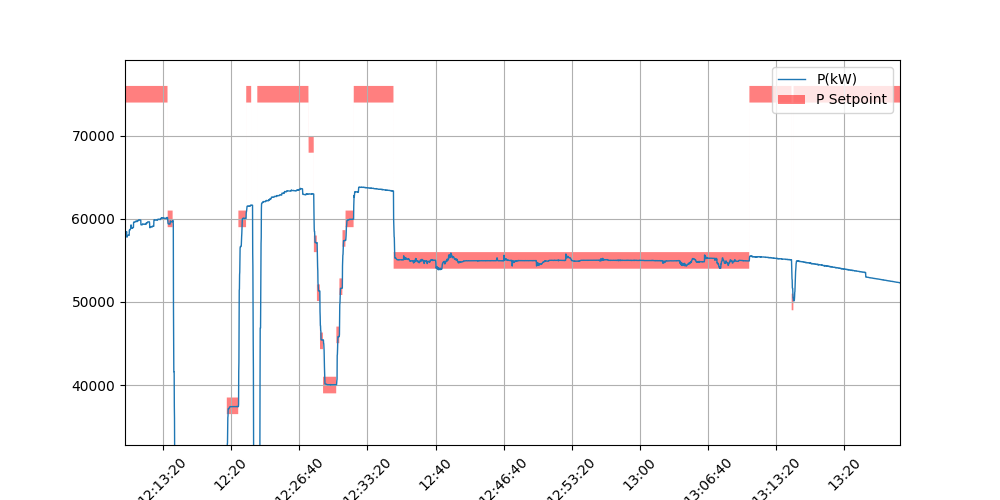

In [65]:
plot_P(data['TIME'],data[P[0]],data[PSP[0]],1000)

<IPython.core.display.Javascript object>


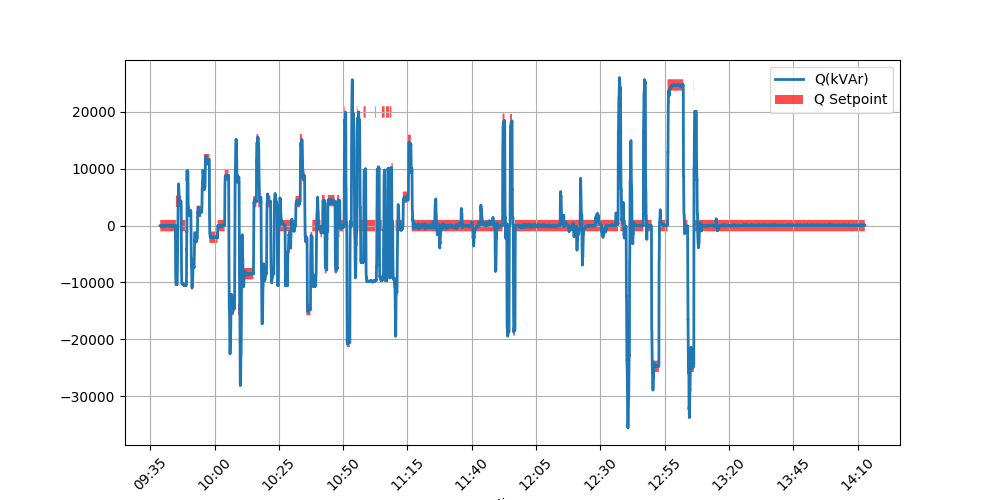

In [40]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
ax=plt.gca()

ax.plot(data['TIME'],data[Q[0]],label='Q(kVAr)',linewidth=2)
ax.fill_between(data['TIME'].values,data[QSP[0]]-1000,data[QSP[0]]+1000,label='Q Setpoint',alpha=0.7,facecolor='red')
# ax.plot(feedbacks['TIME'],feedbacks['SVG_2:Q_COM_F'],"r",label='Command_F')
# ax.plot(feedbacks['TIME'],feedbacks['SVG_2:Q'],label='Output')
# ax.set_ylim(-500, 500)
x = ax.xaxis
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.grid()
# ax.show()
ax.legend()
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.show()
# plt.savefig('test.png',facecolor=fig.get_facecolor(), edgecolor='none',bbox_inches='tight')
# commands_svg1.reset_index().plot(x='TIME',y='Setpoint')
# feedbacks.reset_index().plot(x='TIME',y='SVG_1:Q_COM_F',ax=ax1)

In [8]:
len(data.columns)

1

In [14]:
data.columns[0]

'TIME'